In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data = pd.read_csv("train.csv")
#test_data = pd.read_csv("test.csv")
train_data, test_data = train_test_split(train_data, test_size=0.2)
features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
#features = ["Pclass", "Sex", "SibSp", "Parch"]
X = np.array(pd.get_dummies(train_data[features]))
y = train_data["Survived"]
y_test= test_data["Survived"]
X_test = np.array(pd.get_dummies(test_data[features]))
imp.fit(X)
imp.fit(X_test)
X=imp.transform(X)
X_test=imp.transform(X_test)

In [7]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

Support Vector Classifier

In [8]:
#Default hyperparameters of SVC()
def svm(X,y):
    svm=SVC()
    svm.fit(X,y)
    y_pred=svm.predict(X_test)
    return y_pred

In [9]:
y_pred=svm(X,y)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0])

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8324022346368715


In [11]:
#Hyperparameter tuning using GridsearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': ['auto', 'scale'],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X,y)
print(grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto

In [12]:
#Using the best estimator of GridSearchCV
def svm(X,y):
    svm=SVC(C=0.1, kernel='rbf', gamma='auto')
    svm.fit(X,y)
    y_pred=svm.predict(X_test)
    return y_pred
y_pred=svm(X,y)
y_pred


array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0])

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8212290502793296


In [15]:
#Manual hyperparameter tuning
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [16]:
accuracy_list=[]
for i in range(4):
    svclassifier = getClassifier(i)
    svclassifier.fit(X, y)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print(accuracy)
    #print(classification_report(y_test,y_pred))
#plt.plot(accuracy_list)

Evaluation: Polynomial kernel
0.8044692737430168
Evaluation: RBF kernel
0.8324022346368715
Evaluation: Sigmoid kernel
0.6927374301675978
Evaluation: Linear kernel
0.7877094972067039


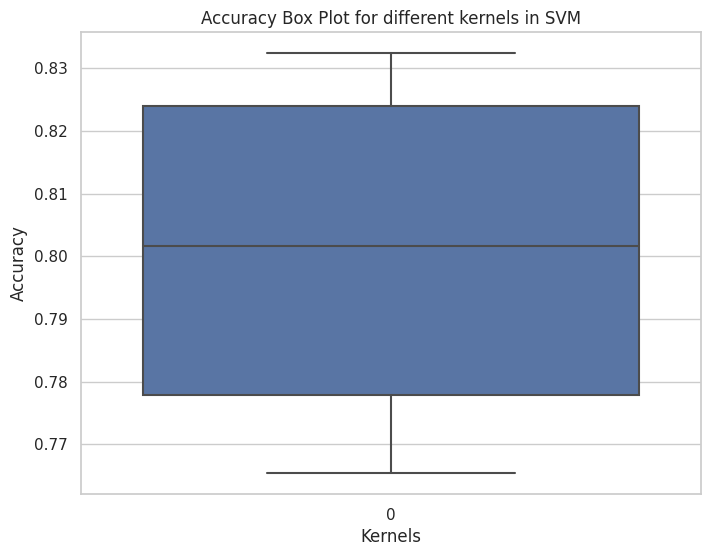

In [19]:
accuracy_scores=(0.8212290502793296,0.8324022346368715, 0.7653631284916201, 0.7821229050279329)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy_scores)
plt.title('Accuracy Box Plot for different kernels in SVM')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.show()

Logistic Regression

In [ ]:
def logistic(X,y):
    lgr=LogisticRegression()
    lgr.fit(X,y)
    y_pred=lgr.predict(X_test)
    return y_pred

In [ ]:
#Default Hyperparameters
y_pred=logistic(X,y)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8100558659217877


In [ ]:
#Manual Hyperparameter Tuning
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
def getClassifier(k):
    if k == 0:
        return LogisticRegression(solver='lbfgs', penalty="l2")
    elif k == 1:
        return LogisticRegression(solver='liblinear', penalty="l1")
    elif k == 2:
        return LogisticRegression(solver='newton-cg', penalty="l2")
    elif k == 3:
        return LogisticRegression(solver='newton-cholesky', penalty="l2", max_iter=3000)
    elif k == 4:
        return LogisticRegression(solver='sag', penalty="l2", max_iter=4000)
    elif k == 5:
        return LogisticRegression(solver='saga', penalty="l2", max_iter=6000)

In [ ]:
for i in range(6):
    logistic = getClassifier(i)
    logistic.fit(X, y)# Make prediction
    y_pred = logistic.predict(X_test)# Evaluate our model
    print("Evaluation:", solvers[i], "solver")
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    #print(classification_report(y_test,y_pred))

Evaluation: lbfgs solver
0.8100558659217877
Evaluation: liblinear solver
0.8100558659217877
Evaluation: newton-cg solver
0.8100558659217877
Evaluation: newton-cholesky solver
0.8100558659217877
Evaluation: sag solver
0.8100558659217877
Evaluation: saga solver
0.7932960893854749


In [ ]:
#GridSearchCV
#penalty is set to 'l2' only as 'liblinear' and 'saga' solver only supports 'l1' and accuracy is unchanged for them
param_grid = {'C': [0.1,1, 10, 100], 'penalty': ['l2'],'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(max_iter=5000),param_grid,refit=True,verbose=2)
grid.fit(X,y)
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, sol

In [ ]:
#Using the best estimator of GridSearchCV
def logistic(X,y):
    lgr=LogisticRegression(C=1, max_iter=5000, solver='liblinear', penalty='l2')
    lgr.fit(X,y)
    y_pred=lgr.predict(X_test)
    return y_pred
y_pred=logistic(X,y)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8100558659217877
